In [3]:
import sqlite3
conn = sqlite3.connect("Chinook_Sqlite.sqlite")
cursor = conn.cursor()

# 1 Basic SQL Queries

## (a)

In [24]:
invoices = cursor.execute('SELECT InvoiceID, CustomerID FROM Invoice ORDER BY Total DESC LIMIT 15')
for row in invoices:
    print(row)

(404, 6)
(299, 26)
(96, 45)
(194, 46)
(89, 7)
(201, 25)
(88, 57)
(306, 5)
(313, 43)
(103, 24)
(208, 4)
(193, 37)
(5, 23)
(12, 2)
(19, 40)


## (b)

In [23]:
first_names = cursor.execute('SELECT Employee.FirstName,Employee.LastName FROM Employee,Customer WHERE Employee.FirstName == Customer.FirstName')
for row in first_names:
    print(row)

('Steve', 'Johnson')
('Robert', 'King')


## (c)

In [25]:
last_names = cursor.execute('SELECT Employee.FirstName,Employee.LastName FROM Employee,Customer WHERE Employee.LastName == Customer.LastName')
for row in last_names:
    print(row)

('Michael', 'Mitchell')


## (d)

In [23]:
cursor.execute('SELECT g.Name,COUNT(*) FROM Track t, Genre g ON g.GenreID == t.GenreID GROUP BY g.GenreID ORDER BY COUNT(*) DESC')
output = cursor.fetchall();
print(output[0][0])
# for row in output:
#     print(row)

Rock


## (e)

In [29]:
cursor.execute('SELECT FirstName, LastName,COUNT(TrackId)\
               FROM \
               (SELECT c.FirstName,c.LastName,c.CustomerId, t.TrackId FROM Customer c\
               INNER JOIN Invoice i ON c.CustomerId == i.InvoiceId\
               INNER JOIN InvoiceLine il ON i.InvoiceId == il.InvoiceId\
               INNER JOIN Track t ON il.TrackId == t.TrackId)\
               GROUP BY CustomerId\
               ORDER BY COUNT(TrackId) DESC')
output = cursor.fetchall()
num = output[0][2]
for row in output:
    if(row[2] == num):
        print(row[:2])

('František', 'Wichterlová')
('Roberto', 'Almeida')
('Tim', 'Goyer')
('Richard', 'Cunningham')
('Ellie', 'Sullivan')
('Dominique', 'Lefebvre')
('Lucas', 'Mancini')
('Steve', 'Murray')


## (f)

In [46]:
cursor.execute("""
                SELECT Name, Cnt
                FROM
                   (
                   SELECT Name,COUNT(AlbumId) AS Cnt
                       FROM 
                       (
                       SELECT Artist.Name, Album.AlbumId FROM Artist
                       INNER JOIN Album USING (ArtistId)
                       )
                   GROUP BY Name
                   )
               WHERE Cnt > 5
               """)
Qf = cursor.fetchall()
for row in Qf:
    print(row)

('Deep Purple', 11)
('Iron Maiden', 21)
('Led Zeppelin', 14)
('Metallica', 10)
('Ozzy Osbourne', 6)
('U2', 10)


## (g)

In [52]:
cursor.execute("""
                SELECT DISTINCT Artist, Genre
                FROM
                   (
                   SELECT ar.Name AS Artist, g.Name AS Genre 
                   FROM Artist ar 
                   INNER JOIN Album al ON ar.ArtistId == al.ArtistId
                   INNER JOIN Track t ON al.AlbumId == t.AlbumId
                   INNER JOIN Genre g ON t.GenreId == g.GenreId
                   )
                WHERE Artist == 'Iron Maiden'
               """)
Qg = cursor.fetchall()
for row in Qg:
    print(row)

('Iron Maiden', 'Rock')
('Iron Maiden', 'Metal')
('Iron Maiden', 'Heavy Metal')
('Iron Maiden', 'Blues')


## (h)

In [48]:
cursor.execute("""
                SELECT Title,Cnt
                FROM
                (
                    SELECT Title,COUNT(DISTINCT PlaylistId) AS Cnt
                    FROM
                       (
                       SELECT a.Title, p.PlaylistId
                       FROM Album a
                       INNER JOIN Track t ON a.AlbumId == t.AlbumId
                       INNER JOIN PlaylistTrack pl ON t.TrackId == pl.TrackId
                       INNER JOIN Playlist p ON p.PlaylistId == pl.PlaylistId
                       )
                    GROUP BY Title
                )
                WHERE Cnt > 3
                """)
Qh = cursor.fetchall()
for row in Qh:
    print(row)

('A Copland Celebration, Vol. I', 4)
('A Soprano Inspired', 5)
('A-Sides', 4)
('Adams, John: The Chairman Dances', 4)
('Adorate Deum: Gregorian Chant from the Proper of the Mass', 5)
('Allegri: Miserere', 5)
('Armada: Music from the Courts of England and Spain', 4)
('Bach: Goldberg Variations', 5)
('Bach: Orchestral Suites Nos. 1 - 4', 5)
('Bach: The Brandenburg Concertos', 4)
('Bach: The Cello Suites', 5)
('Bach: Toccata & Fugue in D Minor', 5)
('Bach: Violin Concertos', 4)
('Bartok: Violin & Viola Concertos', 4)
('Beethoven Piano Sonatas: Moonlight & Pastorale', 5)
('Beethoven: Symhonies Nos. 5 & 6', 5)
("Beethoven: Symphony No. 6 'Pastoral' Etc.", 4)
('Berlioz: Symphonie Fantastique', 5)
('Bizet: Carmen Highlights', 5)
('Black Album', 4)
('Carmina Burana', 5)
('Charpentier: Divertissements, Airs & Concerts', 4)
('Chopin: Piano Concertos Nos. 1 & 2', 5)
('Core', 4)
('Djavan Ao Vivo - Vol. 02', 4)
('Djavan Ao Vivo - Vol. 1', 4)
('Elgar: Cello Concerto & Vaughan Williams: Fantasias', 4

# 2 Clustering Artists

## (a)

In [2]:
import pandas as pd

In [31]:
df = pd.read_sql_query("""
                SELECT ar.Name AS Artist, al.Title AS Album, g.Name AS Genre, p.Name AS Playlist, t.Name AS Track
                FROM Artist ar
                INNER JOIN Album al ON ar.ArtistId == al.ArtistId
                INNER JOIN Track t ON t.AlbumId == al.AlbumId
                INNER JOIN Genre g ON g.GenreId == t.GenreId
                INNER JOIN PlaylistTrack pt ON t.TrackId == pt.TrackId
                INNER JOIN Playlist p ON p.PlaylistId == PT.PlaylistId
               """,conn)
df

,Artist,Album,Genre,Playlist,Track
0,Audioslave,Revelations,Alternative,Music,"Band Members Discuss Tracks from ""Revelations"""
1,Audioslave,Revelations,Alternative,Music,Revelations
2,Audioslave,Revelations,Alternative,Music,One and the Same
3,Audioslave,Revelations,Alternative,Music,Sound of a Gun
4,Audioslave,Revelations,Alternative,Music,Until We Fall
5,Audioslave,Revelations,Alternative,Music,Original Fire
6,Audioslave,Revelations,Alternative,Music,Broken City
7,Audioslave,Revelations,Alternative,Music,Somedays
8,Audioslave,Revelations,Alternative,Music,Shape of Things to Come
9,Audioslave,Revelations,Alternative,Music,Jewel of the Summertime


## (b)

In [47]:
# Use sql query to find artists who have more than one album
artist = pd.read_sql_query("""
                SELECT Name, Cnt
                FROM
                   (
                   SELECT Name,COUNT(AlbumId) AS Cnt
                       FROM 
                       (
                       SELECT Artist.Name, Artist.ArtistId,Album.AlbumId FROM Artist
                       INNER JOIN Album USING (ArtistId)
                       )
                   GROUP BY Name
                   )
               WHERE Cnt > 1
               """,conn)
artist = list(artist['Name'])
print("Artists who have more than one ablum:")
print(artist)
df = df[df['Artist'].isin(artist)]
df

Artists who have more than one ablum:
['AC/DC', 'Accept', 'Amy Winehouse', 'Antônio Carlos Jobim', 'Audioslave', 'Battlestar Galactica', 'Berliner Philharmoniker & Herbert Von Karajan', 'Black Label Society', 'Black Sabbath', 'Caetano Veloso', 'Chico Science & Nação Zumbi', 'Cidade Negra', 'Creedence Clearwater Revival', 'Cássia Eller', 'Deep Purple', 'Djavan', 'English Concert & Trevor Pinnock', 'Eric Clapton', 'Eugene Ormandy', 'Faith No More', 'Foo Fighters', 'Gilberto Gil', 'Green Day', "Guns N' Roses", 'Iron Maiden', 'Jamiroquai', 'Kiss', 'Led Zeppelin', 'Legião Urbana', 'Lost', 'Lulu Santos', 'Metallica', 'Michael Tilson Thomas & San Francisco Symphony', 'Miles Davis', 'Milton Nascimento', 'Nirvana', 'Os Paralamas Do Sucesso', 'Ozzy Osbourne', 'Pearl Jam', 'Queen', 'R.E.M.', 'Red Hot Chili Peppers', 'Santana', 'Skank', 'Smashing Pumpkins', 'Spyro Gyra', 'The Black Crowes', 'The Cult', 'The Office', 'The Rolling Stones', 'The Tea Party', 'Tim Maia', 'Titãs', 'U2', 'Van Halen', 'Va

,Artist,Album,Genre,Playlist,Track
0,Audioslave,Revelations,Alternative,Music,"Band Members Discuss Tracks from ""Revelations"""
1,Audioslave,Revelations,Alternative,Music,Revelations
2,Audioslave,Revelations,Alternative,Music,One and the Same
3,Audioslave,Revelations,Alternative,Music,Sound of a Gun
4,Audioslave,Revelations,Alternative,Music,Until We Fall
5,Audioslave,Revelations,Alternative,Music,Original Fire
6,Audioslave,Revelations,Alternative,Music,Broken City
7,Audioslave,Revelations,Alternative,Music,Somedays
8,Audioslave,Revelations,Alternative,Music,Shape of Things to Come
9,Audioslave,Revelations,Alternative,Music,Jewel of the Summertime


## (c)

In [33]:
genre = pd.read_sql_query("""SELECT g.Name,COUNT(*) 
                            FROM Track t, Genre g ON g.GenreID == t.GenreID 
                            GROUP BY g.GenreID ORDER BY COUNT(*) DESC""",conn)
genre = list(genre['Name'])[:7]
genre

['Rock', 'Latin', 'Metal', 'Alternative & Punk', 'Jazz', 'TV Shows', 'Blues']

In [34]:
artists = pd.unique(df['Artist'])
genre = pd.read_sql_query("""SELECT g.Name,COUNT(*) 
                            FROM Track t, Genre g 
                            ON g.GenreID == t.GenreID 
                            GROUP BY g.GenreID 
                            ORDER BY COUNT(*) DESC
                            """,conn)
genre = list(genre['Name'])[:7]
col = genre
col.insert(0,'Artist')
col.extend(['AlbumsNumber','TracksNumber','PlaylistsNumber'])
print(col)
matrix = pd.DataFrame(columns = col)
for artist in artists:
    row = []
    row.append(artist)
    temp = df[df['Artist'] == artist]
    albumNum = temp['Album'].nunique()
    trackNum = temp['Track'].nunique()
    playlistNum = temp['Playlist'].nunique()
    temp = temp.drop_duplicates(subset = ['Track'])
    for g in genre[1:8]:
        if g not in list(temp['Genre']):
            row.append(0)
        else:
            cnt = temp[temp['Genre'] == g].shape[0]
            row.append(cnt)
    row.append(albumNum)
    row.append(trackNum)
    row.append(playlistNum)
    matrix = matrix.append(pd.Series(row, index = col), ignore_index=True)

matrix

['Artist', 'Rock', 'Latin', 'Metal', 'Alternative & Punk', 'Jazz', 'TV Shows', 'Blues', 'AlbumsNumber', 'TracksNumber', 'PlaylistsNumber']


,Artist,Rock,Latin,Metal,Alternative & Punk,Jazz,TV Shows,Blues,AlbumsNumber,TracksNumber,PlaylistsNumber
0,Audioslave,14,0,0,12,0,0,0,3,40,2
1,Faith No More,15,0,0,37,0,0,0,4,52,2
2,Foo Fighters,33,0,0,11,0,0,0,4,44,2
3,Green Day,0,0,0,34,0,0,0,2,34,2
4,Pearl Jam,50,0,0,13,0,0,0,5,63,3
5,R.E.M.,14,0,0,27,0,0,0,3,41,2
6,Red Hot Chili Peppers,31,0,0,17,0,0,0,3,48,2
7,Smashing Pumpkins,0,0,0,34,0,0,0,2,34,2
8,The Tea Party,0,0,0,22,0,0,0,2,22,2
9,Titãs,0,0,0,38,0,0,0,2,38,2


## (d)

67803.79607843136
36988.67647058823
22804.80586080586
14555.621565934067
10429.565476190477


Text(0.5, 1.0, 'inertia - k')

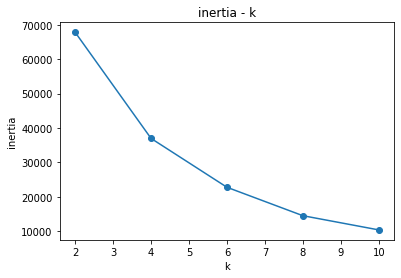

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib

ks=[2,4,6,8,10]
inerias = []
matrix_n = matrix.drop(['Artist'], axis = 1)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(matrix_n)
    y_kmeans = kmeans.predict(matrix_n)
    ineria = kmeans.inertia_
    inerias.append([k, ineria])
    print(ineria)
    
inerias = np.array(inerias)
plt.scatter(inerias[:, 0], inerias[:, 1])   
plt.plot(inerias[:, 0], inerias[:, 1])  
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("inertia - k")

Choose k = 4.  
From the plot, we can see that k = 4 is at the “elbow” of the plot. Therefore, it provides a good tradeoff between accuracy (low value of inertia) and complexity (small value of k), which makes it the ideal number of k.

## (e)

In [45]:
from sklearn.metrics import pairwise_distances_argmin_min

kmeans = KMeans(n_clusters=4)
km = kmeans.fit(matrix_n)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, matrix_n)
print("ID:" + str(closest))
print("Artist:\n")
ind = 1
for i in closest:
    print("Centroid %d\n"%ind)
    print(matrix['Artist'][i])
    print(matrix.iloc[i,:])
    print("\n")
    ind += 1 

ID:[ 0 19 46 12]
Artist:

Centroid 1

Audioslave
Artist                Audioslave
Rock                          14
Latin                          0
Metal                          0
Alternative & Punk            12
Jazz                           0
TV Shows                       0
Blues                          0
AlbumsNumber                   3
TracksNumber                  40
PlaylistsNumber                2
Name: 0, dtype: object


Centroid 2

Gilberto Gil
Artist                Gilberto Gil
Rock                             0
Latin                           15
Metal                            0
Alternative & Punk               0
Jazz                             3
TV Shows                         0
Blues                            0
AlbumsNumber                     3
TracksNumber                    32
PlaylistsNumber                  3
Name: 19, dtype: object


Centroid 3

Led Zeppelin
Artist                Led Zeppelin
Rock                            91
Latin                           

I think the data is clustered highly because of genre. From above we can see that each cluster centroid has must of their songs in different genre. For example, Led Zeppelin's songs are all rock songs, while Gilberto Gil's are about Latin. Iron Maiden and Foo Fighters's songs are more comprehensive. But we can still clear see that their focusing genre are quite different. Thus, I think they are mainly clstered by genre.